In [1]:
import pandas as pd
import numpy as np 

In [4]:
train = pd.read_csv("datasets/train.csv")
test=pd.read_csv("datasets/test.csv")
y_valid = pd.read_csv("datasets/sample_submission.csv")

In [7]:
train.shape

(177576, 23)

In [8]:
test.shape

(76104, 22)

In [9]:
y_valid.shape

(76104, 2)

In [12]:
y = train.target
x = train.drop("target",axis=1)

In [14]:
print("x trian size : ",x.shape)
print("y trian size : ",y.shape)
print("x valid size : ",test.shape)
print("y valid size : ",y_valid.shape)


x trian size :  (177576, 22)
y trian size :  (177576,)
x valid size :  (76104, 22)
y valid size :  (76104, 2)


In [16]:
x.drop('PatientID',axis=1,inplace=True)

In [17]:
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,29,0,0,0,1,1,1,...,1,0,3,0,0,0,0,13,5,8
1,1,0,1,30,0,1,2,0,0,0,...,0,0,2,0,0,0,0,9,5,6
2,0,0,1,31,0,0,0,1,1,1,...,1,0,2,0,7,0,0,10,6,8
3,0,0,1,36,0,0,2,0,0,1,...,1,0,2,0,0,0,0,11,5,6
4,0,1,1,29,0,0,0,1,1,1,...,1,0,4,0,0,1,1,10,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177571,1,1,1,22,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,4,7
177572,0,0,1,26,0,0,0,1,1,1,...,1,0,2,0,0,0,0,7,4,7
177573,0,0,1,26,0,0,0,1,1,1,...,0,0,1,0,0,0,0,6,6,5
177574,1,0,1,25,0,0,0,1,0,1,...,1,0,3,0,2,0,1,11,6,7


In [39]:
x.isnull().sum()

HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177576 entries, 0 to 177575
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   HighBP             177576 non-null  int64
 1   HighChol           177576 non-null  int64
 2   CholCheck          177576 non-null  int64
 3   BMI                177576 non-null  int64
 4   Smoker             177576 non-null  int64
 5   Stroke             177576 non-null  int64
 6   Diabetes           177576 non-null  int64
 7   PhysActivity       177576 non-null  int64
 8   Fruits             177576 non-null  int64
 9   Veggies            177576 non-null  int64
 10  HvyAlcoholConsump  177576 non-null  int64
 11  AnyHealthcare      177576 non-null  int64
 12  NoDocbcCost        177576 non-null  int64
 13  GenHlth            177576 non-null  int64
 14  MentHlth           177576 non-null  int64
 15  PhysHlth           177576 non-null  int64
 16  DiffWalk           177576 non-null  in

In [23]:
import matplotlib.pyplot as plt

In [25]:
train.Education.corr(train.target)

-0.09843154181828118

In [28]:
train.corrwith(train.target)

PatientID            0.004587
HighBP               0.209839
HighChol             0.181495
CholCheck            0.044727
BMI                  0.051915
Smoker               0.114722
Stroke               0.200142
Diabetes             0.181464
PhysActivity        -0.085003
Fruits              -0.020491
Veggies             -0.039542
HvyAlcoholConsump   -0.029198
AnyHealthcare        0.020135
NoDocbcCost          0.031585
GenHlth              0.258040
MentHlth             0.063413
PhysHlth             0.179600
DiffWalk             0.210210
Sex                  0.085802
Age                  0.221841
Education           -0.098432
Income              -0.142447
target               1.000000
dtype: float64

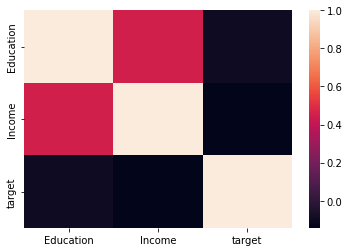

In [35]:
%matplotlib inline
finding_correlations = ['Education','Income','target']
import seaborn as sns
cor = train[finding_correlations].corr()
sns.heatmap(cor)
plt.show()

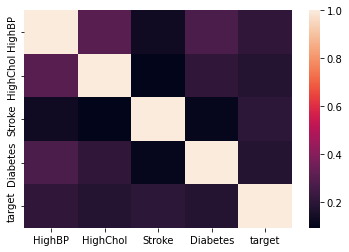

In [44]:
essential_correlations = ['HighBP','HighChol','Stroke','Diabetes','target']
ess_cor = train[essential_correlations].corr()
sns.heatmap(ess_cor)
plt.show()

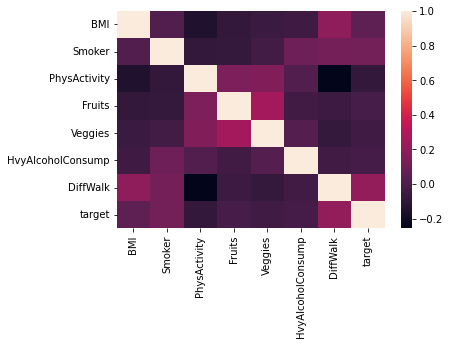

In [43]:
physcial_correlations = ['BMI','Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','DiffWalk','target']
phy_cor = train[physcial_correlations].corr()
sns.heatmap(phy_cor)
plt.show()

In [48]:
train.drop('target',axis=1).corrwith(train.target).max()

0.25804024838227974

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=x.GenHlth)

In [53]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (142060, 21)
y_train shape: (142060,)
x_test shape: (35516, 21)
y_test shape: (35516,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
knn = KNeighborsClassifier()

In [58]:
k_range = list(range(1, 10))
weight = ['uniform', 'distance']
ps=[1,2]
param_grid = dict(n_neighbors=k_range,weights=weight,p=ps)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_) 
print('Best K neighbours:', grid_search.best_estimator_.get_params()['n_neighbors'])
print('Best weight:', grid_search.best_estimator_.get_params()['weights'])
print('Beat P value:',grid_search.best_estimator_.get_params()['p'])
best_k=grid_search.best_estimator_.get_params()['n_neighbors'];
best_w=grid_search.best_estimator_.get_params()['weights'];
best_p=grid_search.best_estimator_.get_params()['p'];

knn = KNeighborsClassifier(n_neighbors=best_k,weights=best_w,p=best_p);

knn.fit(x_train, y_train)

y_test_hat=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

In [ ]:
li = list(range(5,55,5))
dt_scores ={}
for max_depth in li:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train,y_train)
    y_predict=dt.predict(x_test)
    score=accuracy_score(y_test, y_predict)
    dt_scores[max_depth]=score
print(dt_scores)
print("the highest accuracy is : ",max(dt_scores.values()))


In [ ]:
rf_scores=[]
esitmators = list(range(50,550,50))
for max_depth in li:
    for esitmator in esitmators:
        rf = RandomForestClassifier(n_estimators=esitmator,max_depth=max_depth)
        rf.fit(x_train,y_train)
        y_predict = rf.predict(x_test)
        score = accuracy_score(y_test,y_predict)
        rf_scores.append([esitmator,max_depth,score])
rf_df = pd.DataFrame(rf_scores,columns=['esitmator','max_depth','accuracy_score'])
rf_df.iloc[rf_df['accuracy_score'].idxmax()]